# 03_Module

## Neural network based classification

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

** 2. Data structure **

In [2]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print('Image Data Shape' , digits.data.shape)

('Image Data Shape', (1797, 64))


In [3]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

('Label Data Shape', (1797,))


In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

** 3. Visualization **

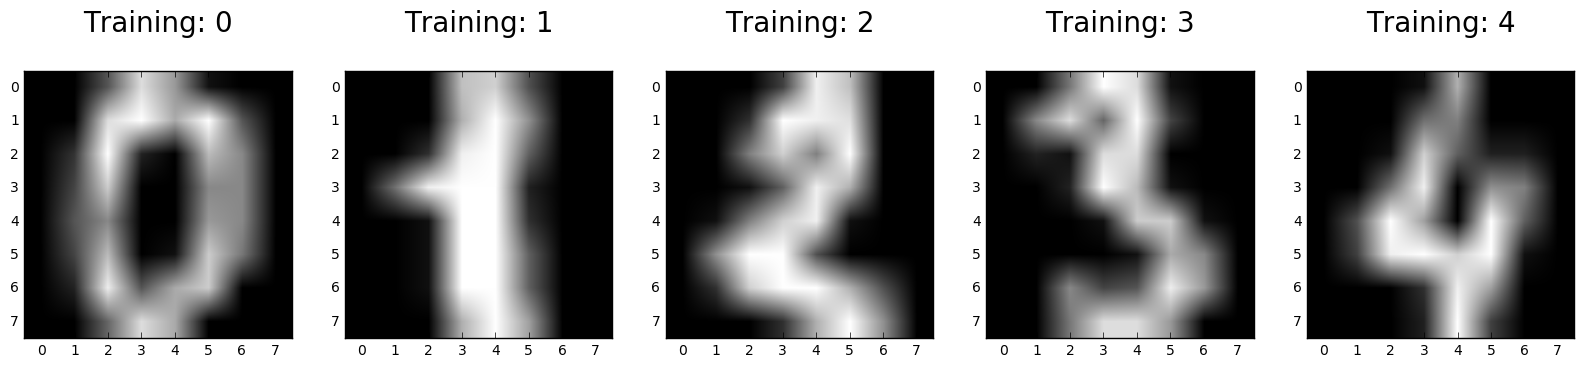

In [6]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

** 4. Splitting data **

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

** 5. Load neural network model **

In [8]:
from sklearn.neural_network import MLPClassifier  

In [9]:
# all parameters not specified are set to their defaults
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  

In [10]:
MLPClassifier?

** 6. Train the model **

In [11]:
mlp.fit(x_train, y_train)  

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

** 7. Test the model **

In [12]:
# Returns a NumPy Array
# Predict for One Observation (image)
mlp.predict(x_test[0].reshape(1,-1))

array([5])

In [13]:
mlp.predict(x_test[0:10])

array([5, 3, 5, 0, 2, 0, 3, 5, 1, 0])

In [14]:
predictions = mlp.predict(x_test)

In [19]:
mlp.n_iter_

296

** 8. Evaluate the model **

In [15]:
# Use score method to get accuracy of model
score_1 = mlp.score(x_test, y_test)
print(score_1)

0.9355555555555556


In [16]:
from sklearn.model_selection import cross_validate

scores_2 = cross_validate(mlp, x_test, y_test, scoring='precision_macro', cv=5, return_train_score=False)

In [17]:
cross_validate?

In [120]:
scores_2

{'fit_time': array([1.08212614, 0.70447206, 0.81012321, 0.54211998, 1.30189896]),
 'score_time': array([0.00086284, 0.00061488, 0.00060201, 0.00061607, 0.000736  ]),
 'test_score': array([0.83908009, 0.85959596, 0.81656162, 0.92513986, 0.89015152])}

In [121]:
# various scoring options: http://scikit-learn.org/stable/modules/cross_validation.html

** 8.1 Confusion matrix **

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [123]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

[[42  0  0  0  0  0  1  0  0  0]
 [ 0 44  1  1  0  0  0  0  2  0]
 [ 0  0 42  1  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  0  0]
 [ 0  0  0  0 48  0  0  0  0  0]
 [ 0  0  0  0  1 50  0  0  0  1]
 [ 0  1  0  0  0  0 52  0  1  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  0  1  0  0  1  0  0 36  0]
 [ 0  1  0  1  0  1  0  0  2 43]]
             precision    recall  f1-score   support

          0       1.00      0.98      0.99        43
          1       0.96      0.92      0.94        48
          2       0.95      0.98      0.97        43
          3       0.92      1.00      0.96        36
          4       0.98      1.00      0.99        48
          5       0.96      0.96      0.96        52
          6       0.98      0.96      0.97        54
          7       1.00      1.00      1.00        40
          8       0.88      0.95      0.91        38
          9       0.98      0.90      0.93        48

avg / total       0.96      0.96      0.96       450



** 9. Wrong classification **

In [124]:
misclassifiedIndexes = []
for i in range(len(y_test)):
    if y_test[i] != predictions[i]:
        misclassifiedIndexes.append(i)

In [125]:
misclassifiedIndexes

[30,
 100,
 132,
 147,
 164,
 182,
 192,
 242,
 244,
 277,
 298,
 299,
 327,
 365,
 392,
 399,
 403]

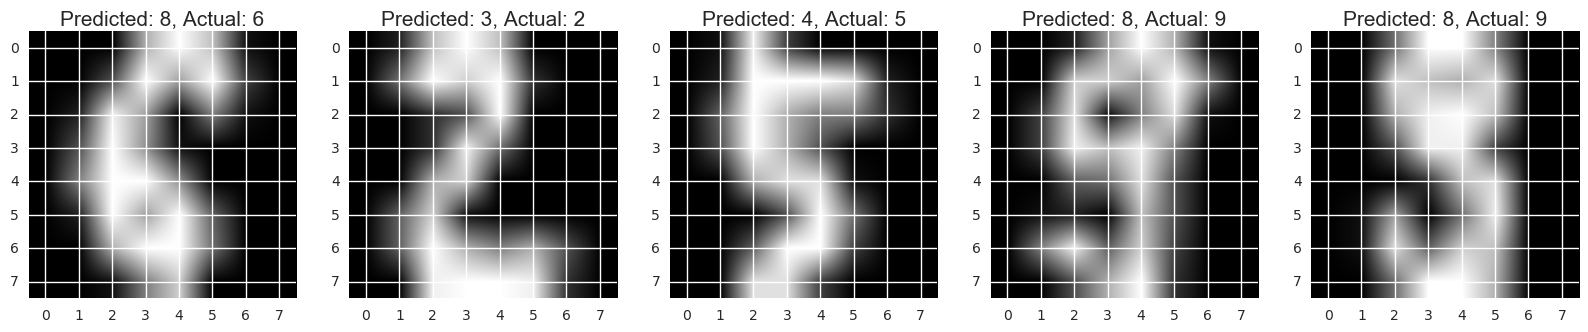

In [126]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(x_test[badIndex], (8,8)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], y_test[badIndex]), 
              fontsize = 15)

## Neural network based classification

example is from https://archive.ics.uci.edu/ml/datasets/iris

** 1. Import data **

In [51]:
import pandas as pd

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
irisdata = pd.read_csv('1_iris.csv', names=names)  

** 2. Data structure **

In [52]:
irisdata.head()  

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
# Assign data from first four columns to X variable
X = irisdata.iloc[:, 0:4]

# Assign data from first fifth columns to y variable
y = irisdata.select_dtypes(include=[object])  

In [54]:
X.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [55]:
y.head()

,Class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [56]:
y.Class.unique()  

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

** 3. Split data **

In [58]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

** 4. Feature scaling **

In [59]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

** 5. Training the model **

In [60]:
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
mlp.fit(X_train, y_train.values.ravel())  

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [61]:
predictions = mlp.predict(X_test)  

In [62]:
predictions

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor'], dtype='|S15')

** 6. Evaluation **

In [63]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.89      1.00      0.94         8

    avg / total       0.97      0.97      0.97        30



## Neural network based regression

the data is from UC Irvine Machine Learning repository

** 1. Read data **

In [65]:
eD = pd.read_csv('2_energyData.csv') 

In [66]:
eD.columns

Index([u'X1', u'X2', u'X3', u'X4', u'X5', u'X6', u'X7', u'X8', u'Y1'], dtype='object')

In [67]:
len(eD)

768

In [68]:
eD.size

6912

In [69]:
eD.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


{'boxes': [<matplotlib.lines.Line2D at 0x1a1c6a8c90>],
 'caps': [<matplotlib.lines.Line2D at 0x1a1c6aa810>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1c667b10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a1c6674d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a1c6a8d90>,
  <matplotlib.lines.Line2D at 0x1a1c6aa1d0>]}

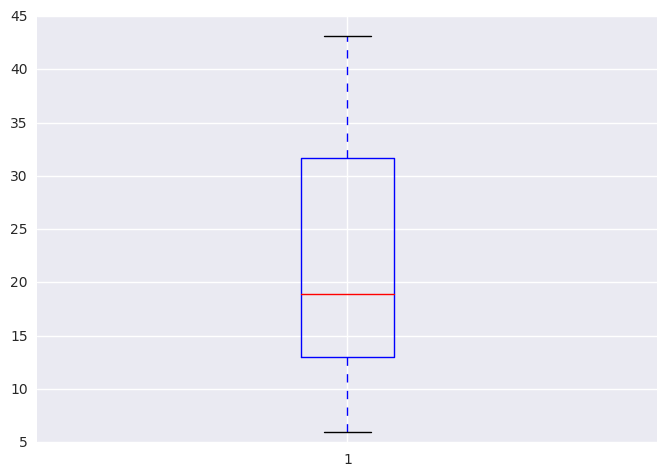

In [70]:
plt.boxplot(eD['Y1'])

** 2. Separate the data **

In [71]:
X = eD.iloc[:, 0:8]

y = eD['Y1']

In [72]:
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [73]:
y.head()

0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: Y1, dtype: float64

** 3. Split the data & 4. Learn the model**

In [74]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [38]:
train_test_split?

In [75]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
model.fit(X_train, y_train) 

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [76]:
MLPRegressor?

In [77]:
predictions = model.predict(X_test)  

In [78]:
predictions

array([21.46992613, 12.45548322, 17.83551016, 12.53385169, 25.80558461,
       22.18016793, 12.37757823, 27.24652285, 13.12393457, 28.85908978,
       21.86310011, 27.16216759, 14.40871475, 12.51979325, 13.16469172,
       21.99770841, 12.54562288, 29.581706  , 29.21356448, 13.09558753,
       21.88638322, 29.00185759, 27.06406333, 43.63300074, 12.58772515,
       12.49187913, 21.39510497, 29.09905161, 43.78264305, 21.32028382,
       18.35694602, 21.63863664, 12.42776041, 28.69991337, 29.20668997,
       12.45334197, 27.7351415 , 28.92703643, 43.37572006, 12.37316655,
       29.29526014, 12.38151   , 12.4130143 , 29.42518918, 17.76068901,
       43.21920324, 13.98889902, 21.92976176, 21.21072204, 25.23948521,
       14.5653342 , 28.87192855, 43.8669983 , 28.68754562, 28.76236677,
       18.42489267, 29.19806612, 21.51596427, 12.56559543, 18.167612  ,
       13.10412266, 29.24960417, 13.14601314, 43.22607775, 25.21620211,
       28.9494093 , 18.25884176, 17.85879327, 22.02099152, 28.76

** 5. Visualization & Evaluation **

In [79]:
import seaborn as sns
%matplotlib inline

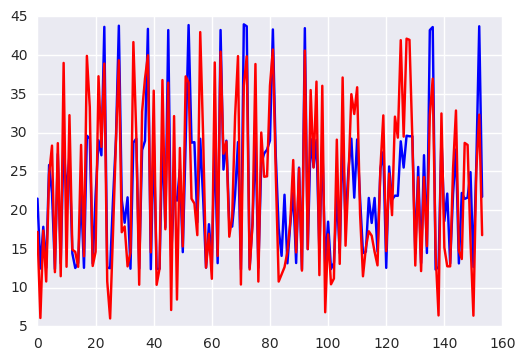

In [80]:
plt.plot(predictions, color='b')
plt.plot(y_test.values, color='r')

In [81]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, predictions)

32.25006974862262

In [150]:
mean_squared_error?
# scikitlearn model evaluation google search for other evaluation metrics

## NN based classification

In [83]:
Re = pd.read_csv('3_Real_estate.csv') 

In [84]:
Re.head()

,ID,ZMM,LAT,LON,ACC,AMC,TYP,FL,RM,BR,PRK,AMT,AMG,SRF,EPL,PRC
0,1,C3,45.412794,11.907546,2,3,1,1,4,1,2,0,1,120,G,95000
1,2,D1,45.448904,11.875156,3,3,1,2,4,2,2,1,0,165,D,225000
2,3,D1,45.448904,11.875156,3,2,1,2,5,2,3,1,0,150,D,225000
3,4,D1,45.448904,11.875156,3,2,1,1,4,2,2,1,1,98,D,148000
4,5,D1,45.448904,11.875156,3,2,1,1,3,1,2,1,0,80,F,138000


In [85]:
Re.columns

Index([u'ID', u'ZMM', u'LAT', u'LON', u'ACC', u'AMC', u'TYP', u'FL', u'RM',
       u'BR', u'PRK', u'AMT', u'AMG', u'SRF', u'EPL', u' PRC '],
      dtype='object')

In [86]:
y1 = Re[' PRC ']
y2 = Re['EPL']

In [87]:
x = Re.iloc[:,2:13]

In [88]:
x.head()

,LAT,LON,ACC,AMC,TYP,FL,RM,BR,PRK,AMT,AMG
0,45.412794,11.907546,2,3,1,1,4,1,2,0,1
1,45.448904,11.875156,3,3,1,2,4,2,2,1,0
2,45.448904,11.875156,3,2,1,2,5,2,3,1,0
3,45.448904,11.875156,3,2,1,1,4,2,2,1,1
4,45.448904,11.875156,3,2,1,1,3,1,2,1,0


/Users/JP48746/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


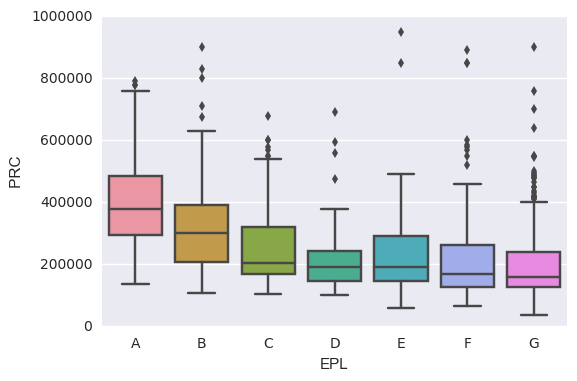

In [89]:
sns.boxplot(x=Re['EPL'], y=Re[' PRC '], order=['A','B','C','D','E','F','G'])

In [90]:
sns.boxplot?

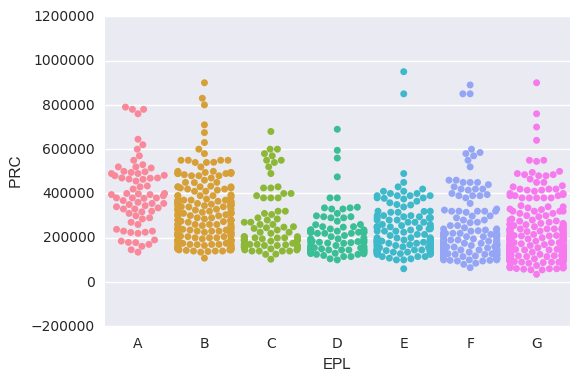

In [91]:
sns.swarmplot(x=Re['EPL'], y=Re[' PRC '], order=['A','B','C','D','E','F','G'])

/Users/JP48746/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


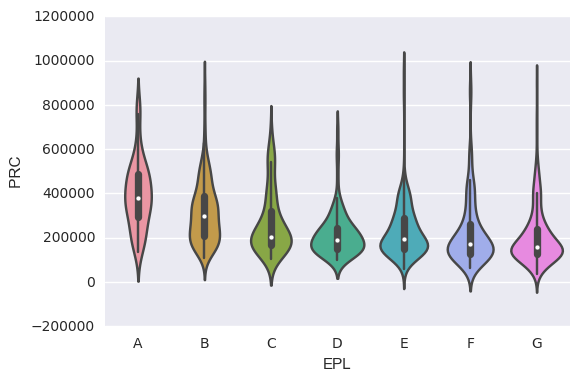

In [92]:
sns.violinplot(x=Re['EPL'], y=Re[' PRC '], order=['A','B','C','D','E','F','G'])

In [93]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(x, y1, test_size = 0.20)

In [94]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
model.fit(X_train, y_train) 

/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [95]:
predictions = model.predict(X_test)  
predictions

array([254184.28276595, 278096.44777139, 269599.00216307, 267237.89291764,
       259854.98650944, 233407.15881193, 274955.07035014, 247194.70675269,
       235204.01972456, 281066.01443507, 300980.8652703 , 211448.28633787,
       198442.6689129 , 325030.61596631, 272209.63692066, 253707.27480745,
       291606.53024811, 260764.97540788, 224292.22155996, 247623.64441814,
       182898.14932914, 237240.65995957, 184436.16069625, 289063.68837531,
       262065.04724789, 225670.22804697, 240329.5959814 , 262473.05158152,
       305130.13089794, 266848.5601853 , 257086.00498806, 188843.97507619,
       241815.26098455, 270220.43172707, 259461.50622955, 202241.43561812,
       224778.93621694, 267674.85001556, 273979.74271176, 227068.8827222 ,
       230330.47399525, 243410.22466286, 310835.88079288, 257110.22247764,
       312244.70193127, 250601.94792405, 275118.14314113, 224338.46490402,
       237635.66844919, 229771.56125001, 262476.3660538 , 235075.52926242,
       248661.02055474, 2

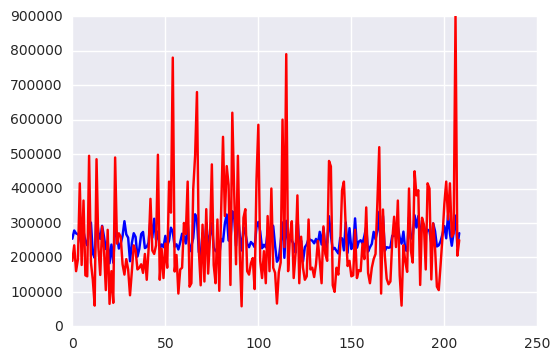

In [96]:
plt.plot(predictions, color='b')
plt.plot(y_test.values, color='r')

In [97]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, predictions)

14381355118.541565

**Think your domain knowledge first**

## NN based classification

In [98]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(x, y2, test_size = 0.20)

In [99]:
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=10000)  
mlp.fit(X_train, y_train) 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [100]:
predictions = mlp.predict(X_test)

In [101]:
# Use score method to get accuracy of model
score_1 = mlp.score(X_test, y_test)
print(score_1)

0.4688995215311005


In [103]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

[[ 0 12  0  0  0  0  0]
 [ 0 42  0  0  0  0  0]
 [ 0 15  0  0  1  0  3]
 [ 0  5  0  0  4  0 14]
 [ 0  1  1  0  5  0 23]
 [ 0  2  0  0  0  0 28]
 [ 0  0  0  0  2  0 51]]
             precision    recall  f1-score   support

          A       0.00      0.00      0.00        12
          B       0.55      1.00      0.71        42
          C       0.00      0.00      0.00        19
          D       0.00      0.00      0.00        23
          E       0.42      0.17      0.24        30
          F       0.00      0.00      0.00        30
          G       0.43      0.96      0.59        53

avg / total       0.28      0.47      0.33       209



/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Lessons learned today

### 1. Using scikit learn is pretty simple (once you practice the basic procedure)

### 2. Data preprocessing is important, if you want to make your data analysis simpler

### 3. Analyzing final result needs your domain knowledge